___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## Nome 1 - Augusto Franco de Paula

## Nome 2 - Gabriel Heusi Pereira Bueno de Camargo

## Nome 3 - Pedro Henrique Carvalho Daher

___

___

# INTRODUÇÃO

        A partir de um interesse sobre carros, o grupo optou por fazer um modelo de previsão dos preços de carros e ainda analisar aqueles considerados "Overpriced", ou seja acima do preço considerado padrão para determinado modelo. 
        A base de dados utilizada para o estudo é de 2017 e avalia apenas carros americanos, dessa forma deve-se explorar esta afim de possibilitar tal modelo de predição. Para isso será importante avaliar quais as variáveis de maior influência sobre o preço de um carro para que ao fim haja uma comparação entre o preço real do carro e seu preço esperado a partir das variáveis que o definem. Por fim a análise de carros acima do preço servirá como dado de eficiência do estudo 
        Dessa forma baseou-se em artigos cientificos e estudos que avaliam os modelos de distribuicão destes preços, entre eles estão: 

___
# MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import os
import math
from sklearn.linear_model import Ridge, Lasso
from sys import stdin
from numpy import arange
import numpy as np
import seaborn as sns
from sklearn import preprocessing, cross_validation, neighbors

In [20]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())
data = pd.read_csv('data.csv')


Esperamos trabalhar no diretório
C:\Users\Gabriel Camargo\Documents\Insper - Engenharia\Ciência dos Dados - DP\Projeto 3


# BASE DE DADOS

In [21]:
data = shuffle(data)
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1139,GMC,Acadia,2015,regular unleaded,281.0,6.0,AUTOMATIC,front wheel drive,4.0,Crossover,Midsize,4dr SUV,24,17,549,33975
7895,Maserati,Quattroporte,2017,premium unleaded (required),523.0,8.0,AUTOMATIC,rear wheel drive,4.0,"Exotic,Factory Tuner,Luxury,High-Performance",Large,Sedan,22,15,238,145500
3481,Dodge,Dakota,2010,flex-fuel (unleaded/E85),302.0,8.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Compact,Crew Cab Pickup,19,14,1851,31365
2261,Toyota,Camry,2017,regular unleaded,268.0,6.0,AUTOMATIC,front wheel drive,4.0,Performance,Midsize,Sedan,30,21,2031,31370
10857,Nissan,Truck,1996,regular unleaded,134.0,4.0,MANUAL,four wheel drive,2.0,NaN,Compact,Extended Cab Pickup,18,15,2009,2762


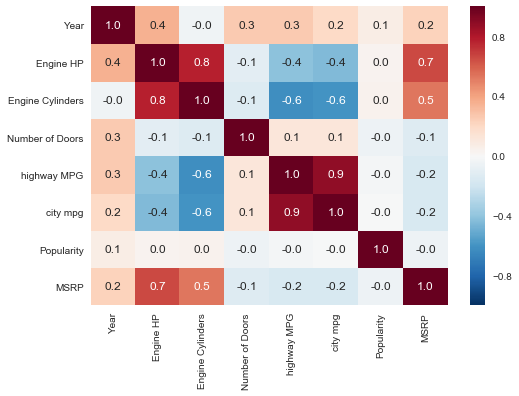

In [22]:
sns.heatmap(data.corr(), annot=True, fmt=".1f")
plt.show()

### A partir do mapa mostrado acima é possível identificar a influência (correlação) de uma variável sobre o preço de um carro. Dessa forma basta analisar e perceber que as três que apresentam maior proporcionalidade são: Ano de fabricação (Year), Potência do Motor (Engine HP) e número de cilindros (Engine Cylinders). Vale lembrar que isto era esperado, afinal essa ferramenta só é capaz de comparar dados quantitativos.

# Análise Descritiva

### A partir desta seção será reavaliada a ideia das variáveis e sua distribuição de acordo com o preço. Como por exemplo a "Engine Cylinders" será categorizado como uma espécie de força fornecida pelos cilindros ao carro e ainda observar onde a predominância do preço dos carros, separando em faixas de valor de compra/venda. 

In [23]:
data = data.loc[data['Engine Cylinders']>0,['Year','Engine HP','Engine Cylinders','MSRP']]
data = data.loc[data['MSRP']<125000,['Year','Engine HP','Engine Cylinders','MSRP']]
data = data.loc[data['Engine HP']>0,['Year','Engine HP','Engine Cylinders','MSRP']]
data.columns=["Ano","Potência","Cilindros","Price"]
data.dropna()

,Ano,Potência,Cilindros,Price
1139,2015,281.0,6.0,33975
3481,2010,302.0,8.0,31365
2261,2017,268.0,6.0,31370
10857,1996,134.0,4.0,2762
7711,2001,125.0,4.0,14155
673,1993,389.0,12.0,3211
1950,2017,170.0,4.0,19995
8664,2003,220.0,6.0,35125
7170,2003,132.0,4.0,15340
9114,2015,381.0,8.0,64320


In [24]:
faixa = range(5000,80000,3000)
price = pd.cut(data.Price, bins=faixa)
price.value_counts(sort=False, normalize=True)*100

(5000, 8000]       0.291545
(8000, 11000]      0.205161
(11000, 14000]     0.831444
(14000, 17000]     4.459562
(17000, 20000]     6.046863
(20000, 23000]     9.405032
(23000, 26000]    11.186697
(26000, 29000]    10.538819
(29000, 32000]    10.679192
(32000, 35000]     8.638376
(35000, 38000]     7.482993
(38000, 41000]     6.165641
(41000, 44000]     5.344995
(44000, 47000]     4.070835
(47000, 50000]     3.358169
(50000, 53000]     2.569917
(53000, 56000]     1.997624
(56000, 59000]     1.241767
(59000, 62000]     1.382140
(62000, 65000]     1.446928
(65000, 68000]     0.950221
(68000, 71000]     0.701868
(71000, 74000]     0.442717
(74000, 77000]     0.561494
Name: Price, dtype: float64

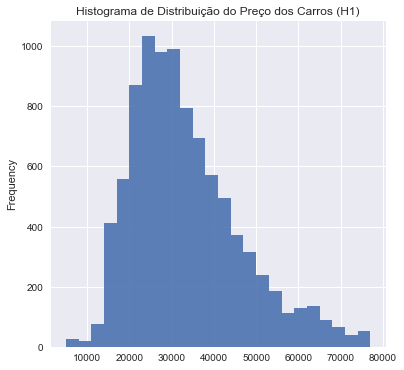

In [25]:
plot = data.Price.plot.hist(bins=faixa,title='Histograma de Distribuição do Preço dos Carros (H1)', figsize=(6, 6), alpha=0.9)
plt.show()

#### Histograma que possibilita a visualização da distribuição dos preços dos carros de acordo com faixas de preço.

___
# MODELOS DE PREDIÇÃO

[O tópico C.PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO estará dentro deste tópico. Organize-o aqui de forma clara!]

[ORGANIZE AQUI TODOS OS MODELOS DE PREDIÇÃO NECESSÁRIOS NESTE PROJETO!]

o MODELO DE PREDIÇÃO PELA MÉDIA

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

### Sepração da base de dados em treino e teste, considerando que 30% do dataframe ('data') será selecionado aleatoriamente para teste e os outros 70% para treinamento

In [26]:
from sklearn.model_selection import train_test_split as split
train, test = split(data, test_size=0.3)
train.describe()

,Ano,Potência,Cilindros,Price
count,7914.000000,7914.000000,7914.000000,7914.000000
mean,2010.274956,236.901440,5.465631,31314.605636
std,7.672591,92.422437,1.466297,20489.059983
min,1990.000000,55.000000,3.000000,2000.000000
25%,2006.000000,170.000000,4.000000,20321.250000
50%,2015.000000,220.000000,6.000000,29099.500000
75%,2016.000000,292.000000,6.000000,40043.750000
max,2017.000000,707.000000,12.000000,124900.000000


## MODELO DE PREDIÇÃO PELA MÉDIA

### O primeiro modelo de predição realizado foi pela média, que consiste basicamente na análise da média da variável que esperamos prever, no caso o preço dos carros. Para isso basta analisar a média de preços e essa será o valor esperado para o carro

In [27]:
print('O preço esperado de um carro a partir da predição pela média é:',train.Price.mean())

O preço esperado de um carro a partir da predição pela média é: 31314.605635582513


### Coeficiente de determinação (R2) e Raiz do erro médio quadrático (RMS)

In [28]:
n = len(train)
fi = train.Price.mean()
ybarra = train.Price.mean()
yi=train.Price

def R2 (ybarra, fi, yi):
    a = ((yi-fi)**2).sum()
    b = ((yi-ybarra)**2).sum()
    r2=1-(a/b)
    return[r2]

def RSM (ybarra, fi, yi):
    c = ((yi-ybarra)**2).sum()
    raiz = ((1/n)*c)**0.5
    return[raiz]
    
print (R2(ybarra, fi, yi))
print (RSM(ybarra, fi, yi))

[0.0]
[20487.765460176586]


## MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

### A seguir deve ser feito um segundo modelo de predição, no caso o chamado K-Nearest Neighbors Regression, que consiste basicamente em prever o valor do carro baseado em seus vizinhos mais próximos e seus atributos (exceto preço, já que este é usado para o cálculo da média). Isto é, este modelo se fundamenta em descobrir o valor do preço através de uma média dos preços de seus k vizinhos mais próximos. Para determinar quais são os vizinhos mais próximos, um cáclulo é feito e os vizinhos são selecionados.

In [29]:
x = np.array(data.drop(['Price'],1))
y = np.array(data['Price'])

x_train, x_test,y_train, y_test=cross_validation.train_test_split(x,y,test_size=0.5)
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)
accuracy=clf.score(x_test, y_test)
print (accuracy)

0.0995931363878


### Na célula acima foi determinado o alvo à predição: "Price". A base train (25%) e test(75%) foi separada. Além disso uma nova ferramenta foi disposta para verificar a veracidade dos dados: "accuracy". Apesar do "accuracy estar próximo a 10%, o valor ("Price") deste modelo de regressão não ficou muito distante do valor ("Price") real.

In [30]:
ano = input('Digite o ano (2006 até 2017): ')
potencia = input("Digite a potencia (150 até 707): ")
cilindros = input("Digite a quantidade de cilindros (3 até 12): ")

ee=np.array([ano,potencia,cilindros])
ee=ee.reshape(1,-1)
prediction = clf.predict(ee)
print(prediction)

Digite o ano (2006 até 2017): 2010
Digite a potencia (150 até 707): 300
Digite a quantidade de cilindros (3 até 12): 6
[48010]


### Há aqui uma interação entre o usuário e o programa. Sendo que, através da célula acima e do modelo de ressão dos K-vizinhos mais próximos, o usuário é capaz de prever o preço de um carro digitando seu ano, sua potência e sua quantidade de cilindros.

### Coeficiente de determinação (R2) e Raiz do erro médio quadrático (RMS)

In [31]:
n = len(train)
fi = prediction
ybarra = train.Price.mean()
yi=train.Price

def R2 (ybarra, fi, yi):
    a = ((yi-fi)**2).sum()
    b = ((yi-ybarra)**2).sum()
    r2=1-(a/b)
    return[r2]

def RSM (ybarra, fi, yi):
    c = ((yi-ybarra)**2).sum()
    raiz = ((1/n)*c)**0.5
    return[raiz]
    
print (R2(ybarra, fi, yi))
print (RSM(ybarra, fi, yi))

[0.9999442438344193]
[20487.765460176586]


## MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

## O próximo modelo preditivo a ser realizado para análise dos preços de carro é pelo método de regressão linear, este se baseia.... 

In [32]:
atributos = [ "Potência","Cilindros", "Ano"]
objetivo = ['Price']

In [33]:
def ridge_regression(train, atributos, alpha):
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(train[atributos],train['Price'])
    y_pred = ridgereg.predict(train[atributos])
    return(y_pred)

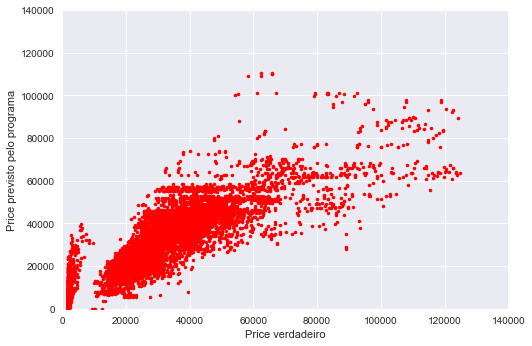

In [34]:
ridge = ridge_regression(train, atributos,1e-5)
plt.plot(train['Price'],ridge,'.', color="red")
plt.axis([0, 140000, 0, 140000])
plt.xlabel("Price verdadeiro")
plt.ylabel("Price previsto pelo programa")
plt.show()

### Coeficiente de determinação (R2) e Raiz do erro médio quadrático (RMS)

In [35]:
n = len(train)
fi = ridge
ybarra = train.Price.mean()
yi=train.Price

def R2 (ybarra, fi, yi):
    a = ((yi-fi)**2).sum()
    b = ((yi-ybarra)**2).sum()
    r2=1-(a/b)
    return[r2]

def RSM (ybarra, fi, yi):
    c = ((yi-ybarra)**2).sum()
    raiz = ((1/n)*c)**0.5
    return[raiz]
    
print (R2(ybarra, fi, yi))
print (RSM(ybarra, fi, yi))

[0.7260483815058083]
[20487.765460176586]


## MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

### O último modelo de predição necessário é conhecido por Decision Tree Regression, ou seja Árvores de Regressão. Nesse caso as árvores de decisão são usadas para ajustar uma curva senoidal com observação adicional de variáveis...

In [36]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
model.fit(X, Y)
model.score(X, Y)
ano = input('Digite o ano (2006 até 2017): ')
potencia = input("Digite a potencia (150 até 707): ")
cilindros = input("Digite a quantidade de cilindros (3 até 12): ")
ee=np.array([ano,potencia,cilindros,(train.Price.mean())])
ee=ee.reshape(1,-1)
predicted = model.predict(ee)
print(predicted)

NameError: name 'X' is not defined

### 